#  <center> <font color =  darkbrown> **W4T3 AAPL stocks in 2022 and 2023**



---

---
## <center> <font color =  green>By Vipul Arora
### <center> <font color =  green>Sep 23 2023
 ### <center> <font color =  green>DSA 501 Fall 2023

#<center>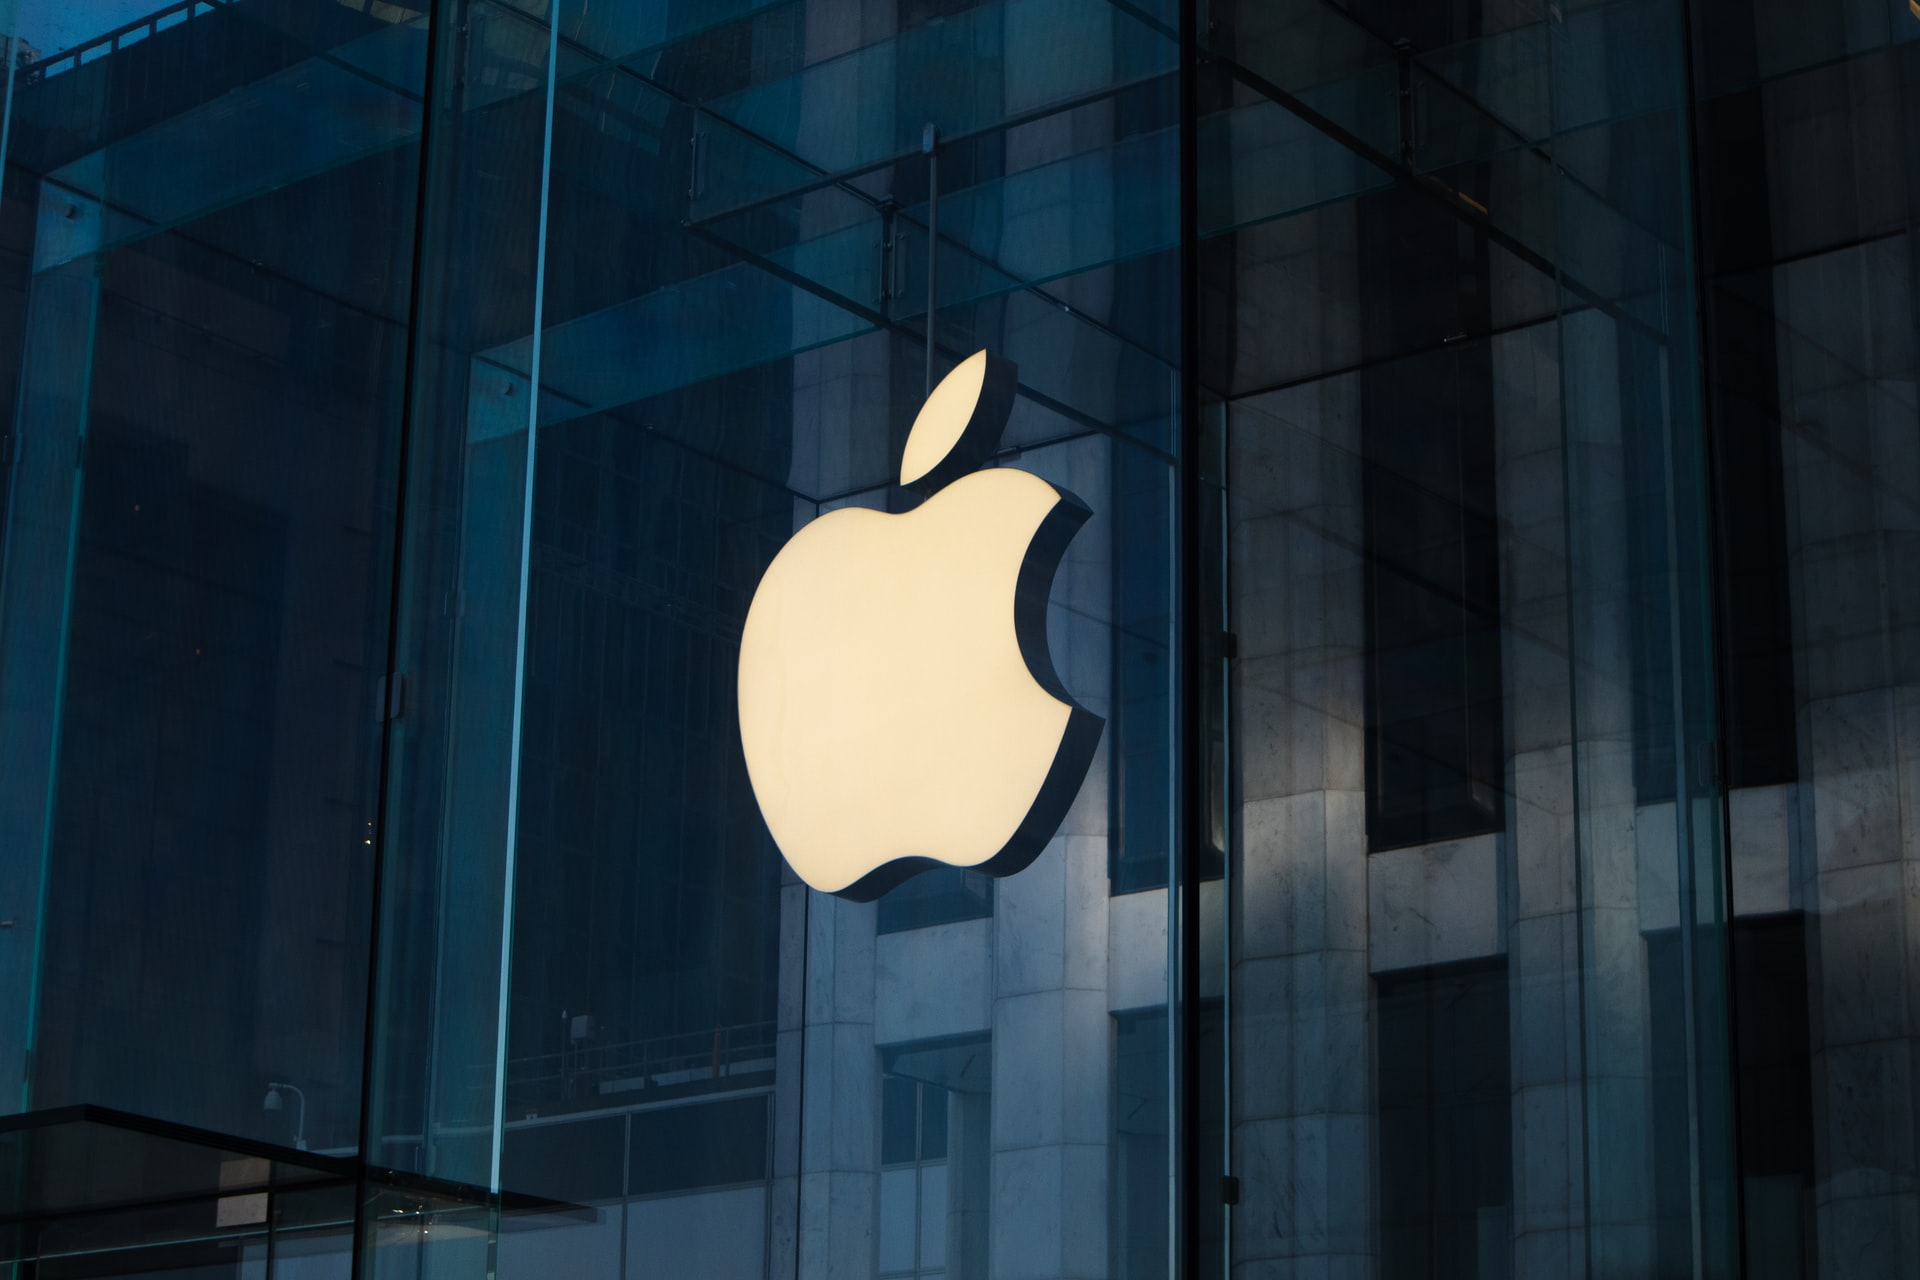

#  <center> 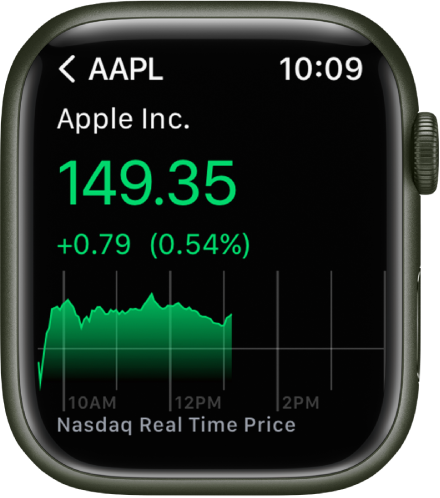

# <center> <font color =  green> INTRODUCTION
Apple Inc (Apple) designs, manufactures, and markets smartphones, tablets, personal computers (PCs), portable and wearable devices. The company also offers software and related services, accessories, and third-party digital content and applications. Apple’s product portfolio includes iPhone, iPad, Mac, iPod, Apple Watch, and Apple TV. It offers various consumer and professional software applications such as iOS, macOS, iPadOS, and watchOS, iCloud, AppleCare, Apple Pay, and accessories. Apple sells and delivers digital content and applications through Apple Store, App Store, Apple Arcade, Apple News+, Apple Fitness+, Apple Card, Apple Pay, and Apple Music. The company has business presence across the Americas, Europe, the Middle East, Africa, and Asia-Pacific. Apple is headquartered in Cupertino, California, the US.

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the Apple stock. We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history.

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

##  <font color =  green>Downloading the Apple stock data from Yahoo Finance



In [5]:
# @title
# Importing Libararies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT,]
company_name = ["APPLE", "GOOGLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-15,366.850006,372.399994,366.279999,370.730011,370.730011,78478200,MICROSOFT
2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900,MICROSOFT
2023-12-19,371.489990,373.260010,369.839996,373.260010,373.260010,20603700,MICROSOFT
2023-12-20,375.000000,376.029999,370.529999,370.619995,370.619995,26316700,MICROSOFT
2023-12-21,372.559998,374.410004,370.040009,373.540009,373.540009,17708000,MICROSOFT
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100,MICROSOFT
2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100,MICROSOFT
2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400,MICROSOFT
2023-12-28,375.369995,376.459991,374.160004,375.279999,375.279999,14327000,MICROSOFT


In [6]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,172.256681,173.857520,170.981880,172.549000,172.121111,5.921703e+07
std,17.530359,17.261055,17.535099,17.331672,17.504123,1.777392e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,161.555000,162.387501,160.699997,162.112499,161.457546,4.781208e+07
50%,175.244995,177.025002,173.840004,175.475006,175.244133,5.507750e+07
75%,186.805000,188.095001,185.174995,187.330002,187.177856,6.574292e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## <center><font color =  green> Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

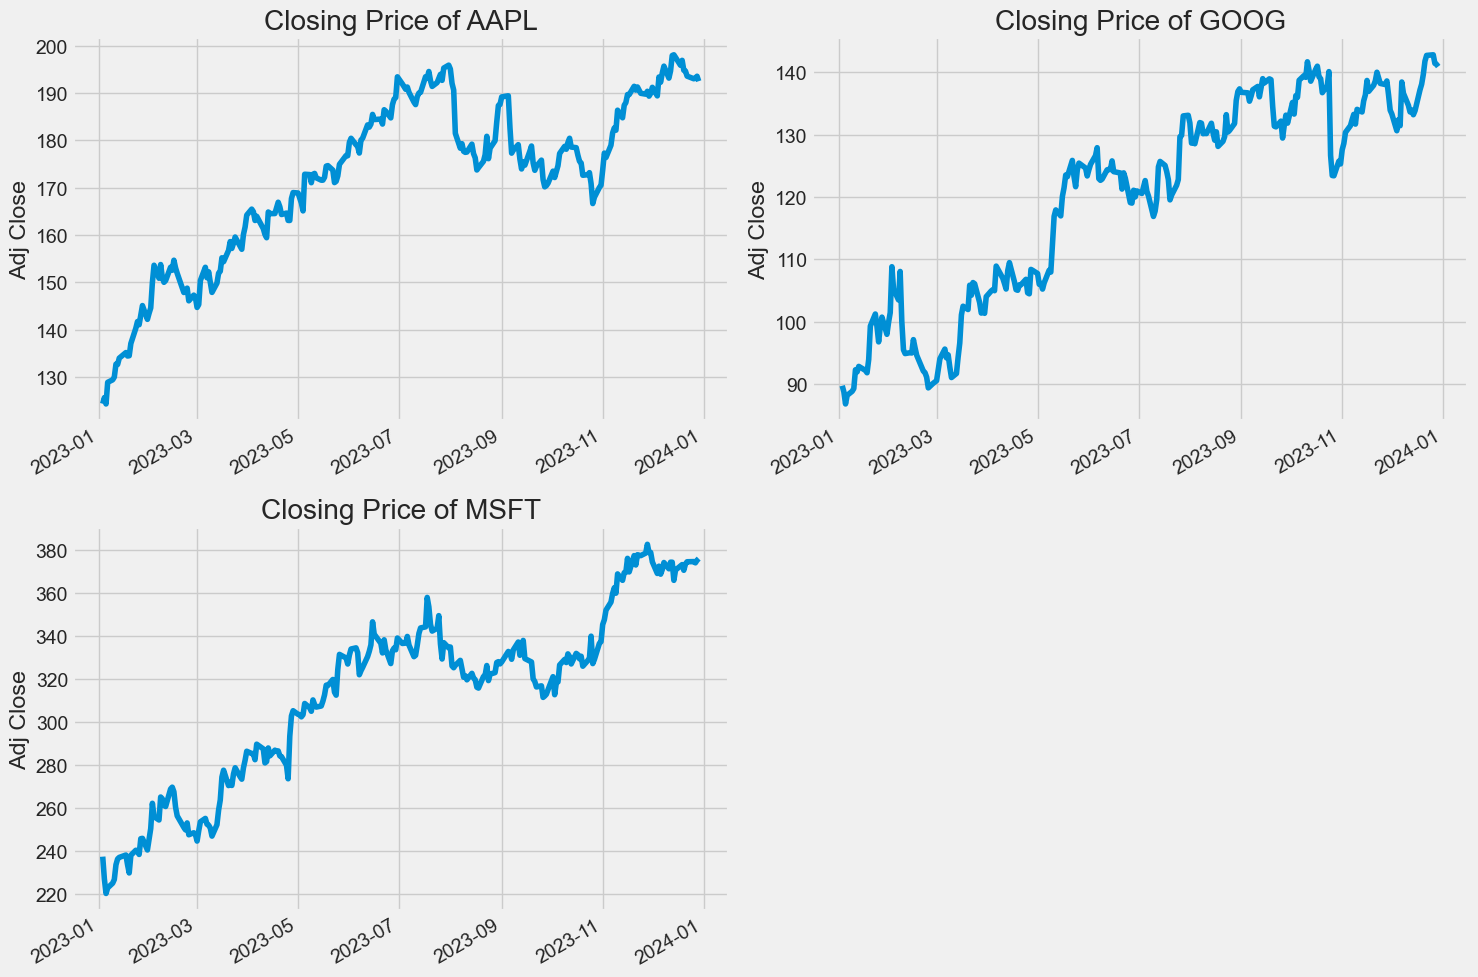

In [8]:
# @title
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

 # <font color =  green> Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders. :

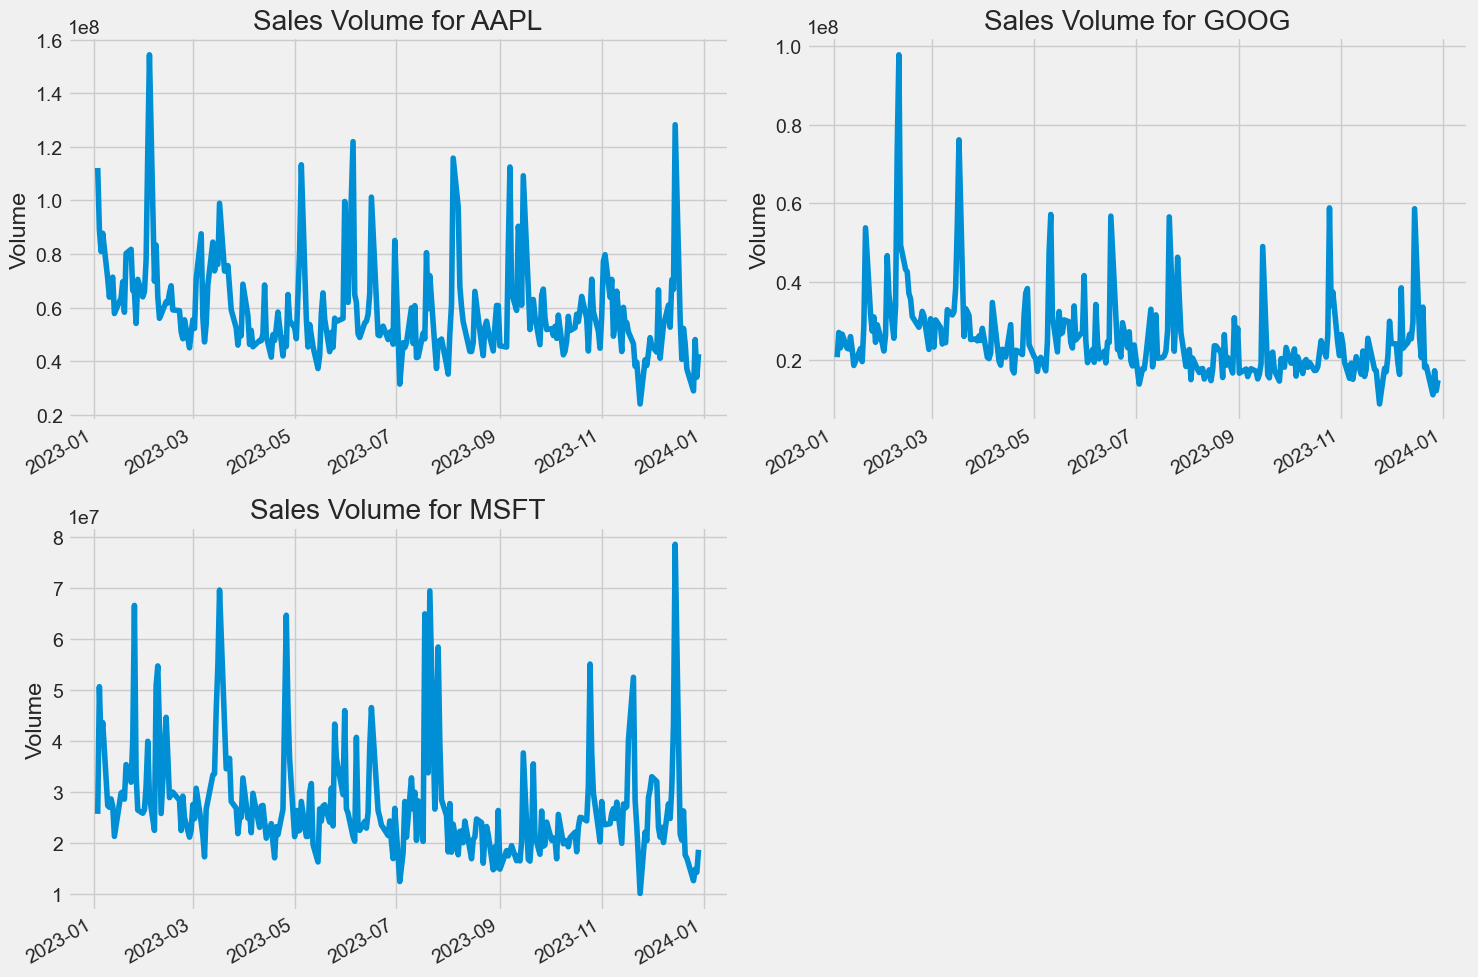

In [9]:
# @title
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

##What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

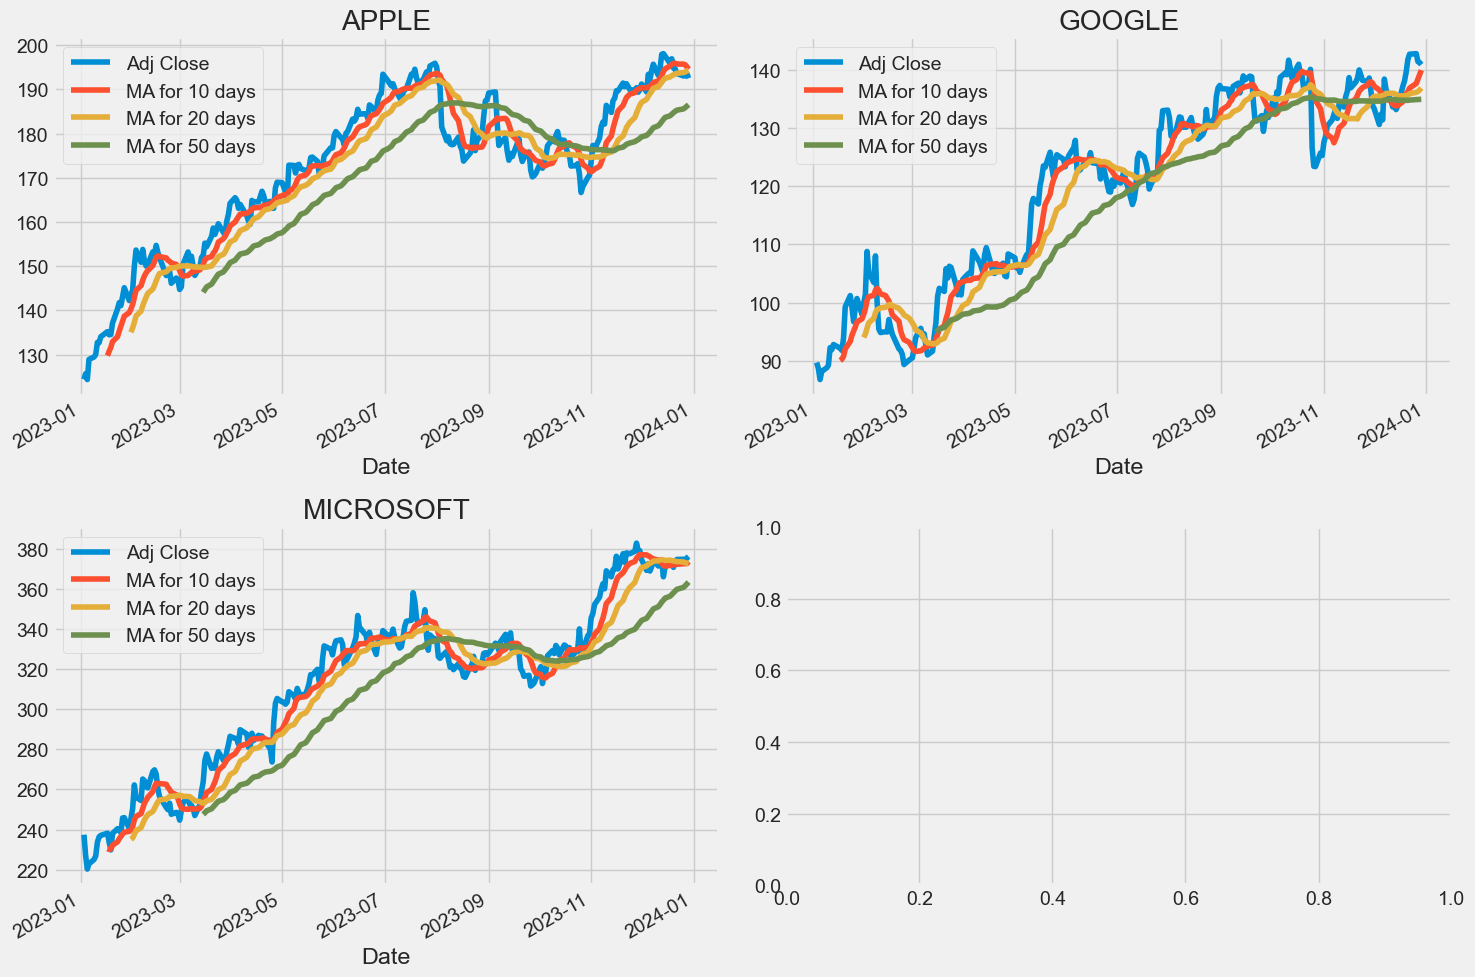

In [10]:
# @title
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')


fig.tight_layout()

##What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

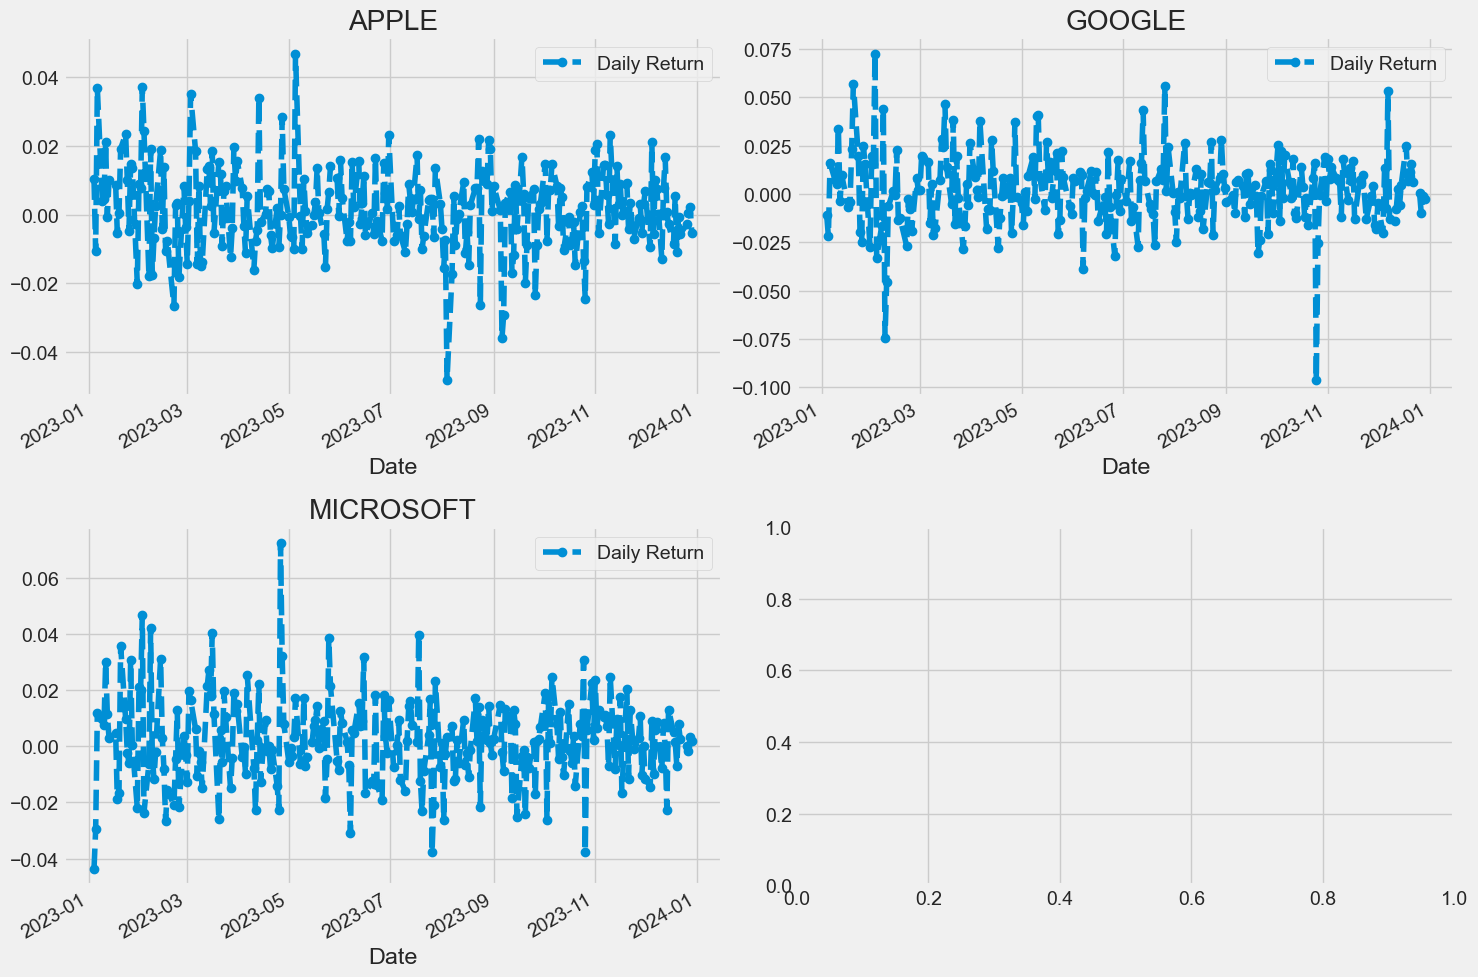

In [11]:
# @title
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

fig.tight_layout()

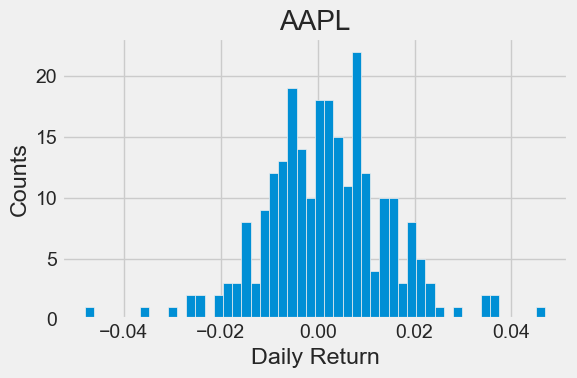

In [12]:
# @title
# Create the histogram
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
AAPL['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('AAPL')

plt.tight_layout()
plt.show()

Copying df to new data frame bod_uncleaned

In [13]:
# @title
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  3 of 3 completed


,AAPL,GOOG,MSFT
Date,,,
2023-01-03,NaN,NaN,NaN
2023-01-04,0.010314,-0.011037,-0.043743
2023-01-05,-0.010605,-0.021869,-0.029638
2023-01-06,0.036794,0.016019,0.011785
2023-01-09,0.004089,0.007260,0.009736


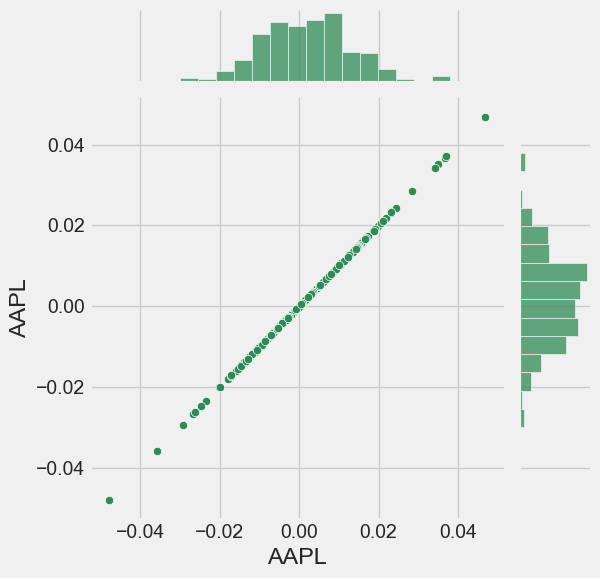

In [14]:
# Comparing Apple to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

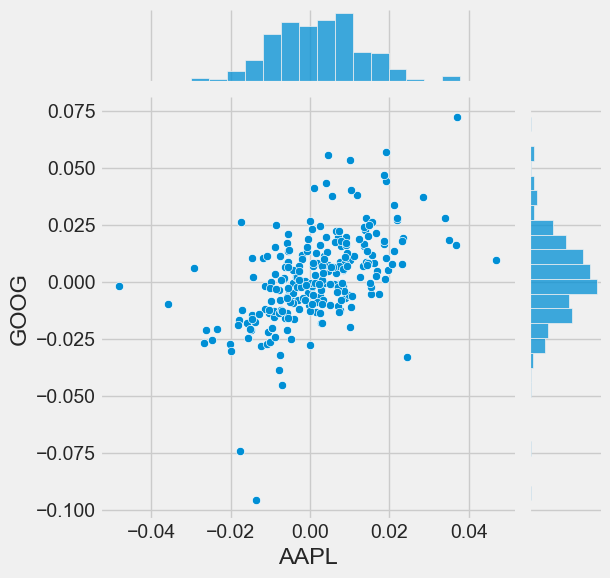

In [15]:
# We'll use joinplot to compare the daily returns of apple and Microsoft
sns.jointplot(x='AAPL', y='GOOG', data=tech_rets, kind='scatter')
#AAPL
#GOOG
#MSFT

##How much value do we put at risk by investing in a particular stock?

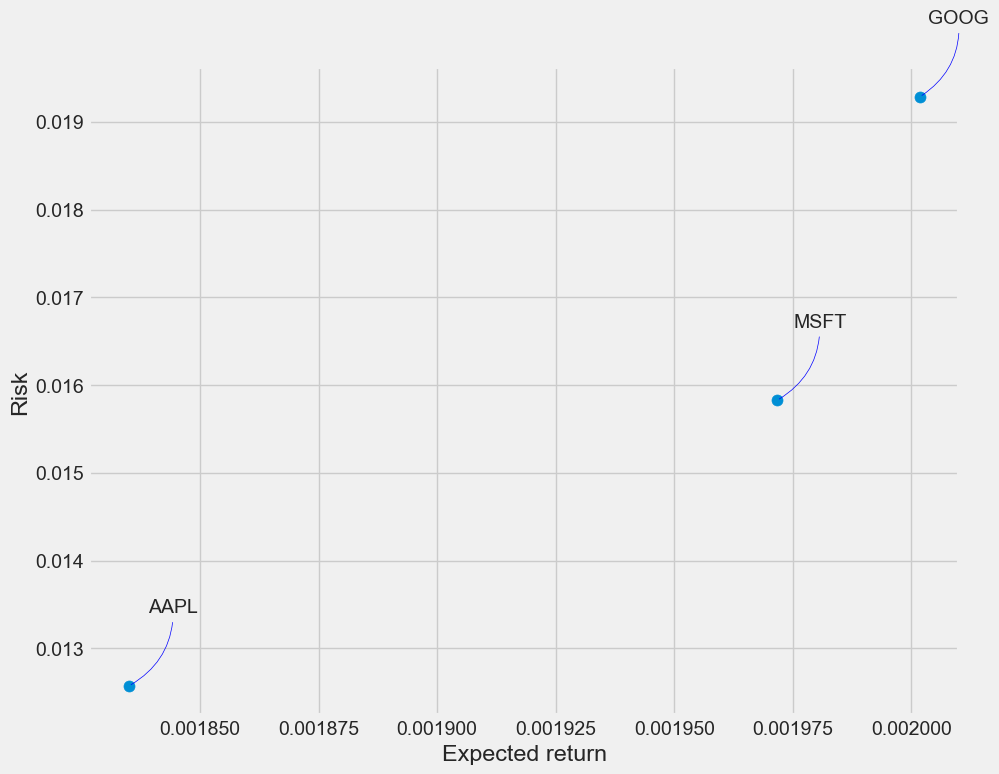

In [16]:
# @title
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [17]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516594,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900


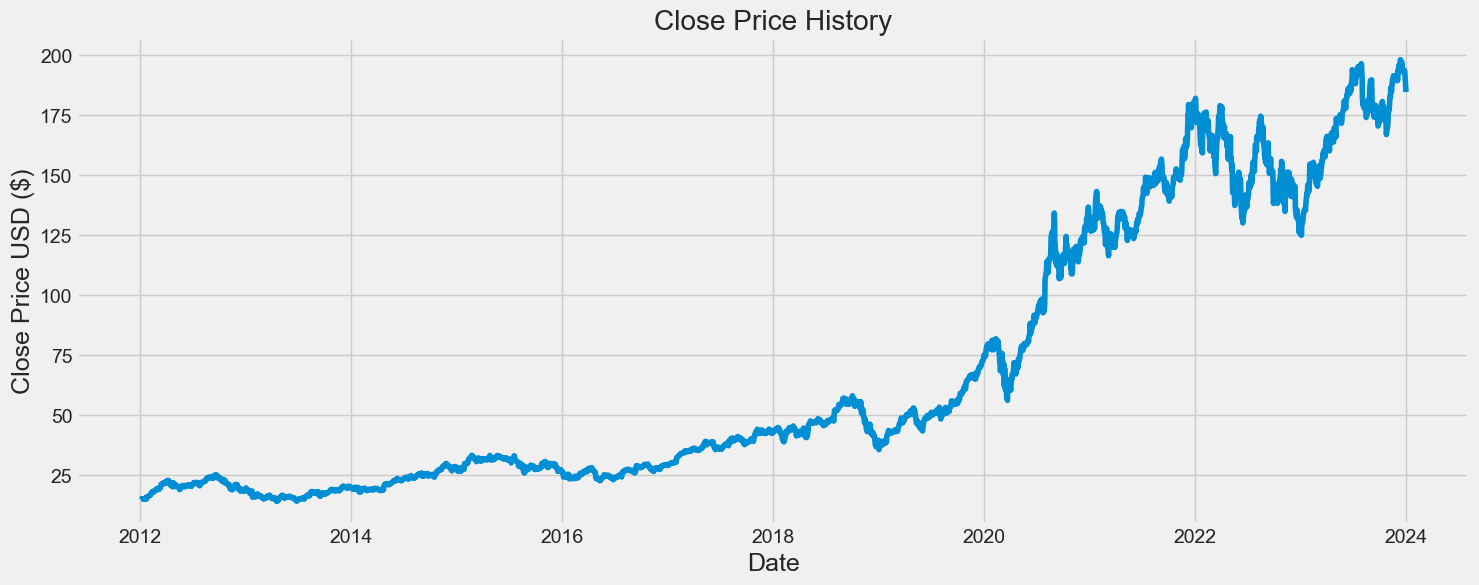

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()